In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("amazon.csv")
df.info()
df.describe()
df.dropna(inplace=True)

# convert numeric columns to proper data types

#convert price and discount to numeric
df["discounted_price"] = df["discounted_price"].str.replace("₹", "").str.replace(",", "").astype(float)
df["actual_price"]=df["actual_price"].str.replace("₹", "").str.replace(",", "").astype(float)
df["discount_percentage"]=df["discount_percentage"].str.replace("%", "").astype(float)

#convert rating and rating_count to numeric
df["rating"]=pd.to_numeric(df["rating"], errors='coerce')
df["rating_count"]=pd.to_numeric(df["rating_count"], errors='coerce')

df.isnull().sum()  # Check missing values
df.fillna(0, inplace=True)  # Replace NaNs with 0 (or another strategy)






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

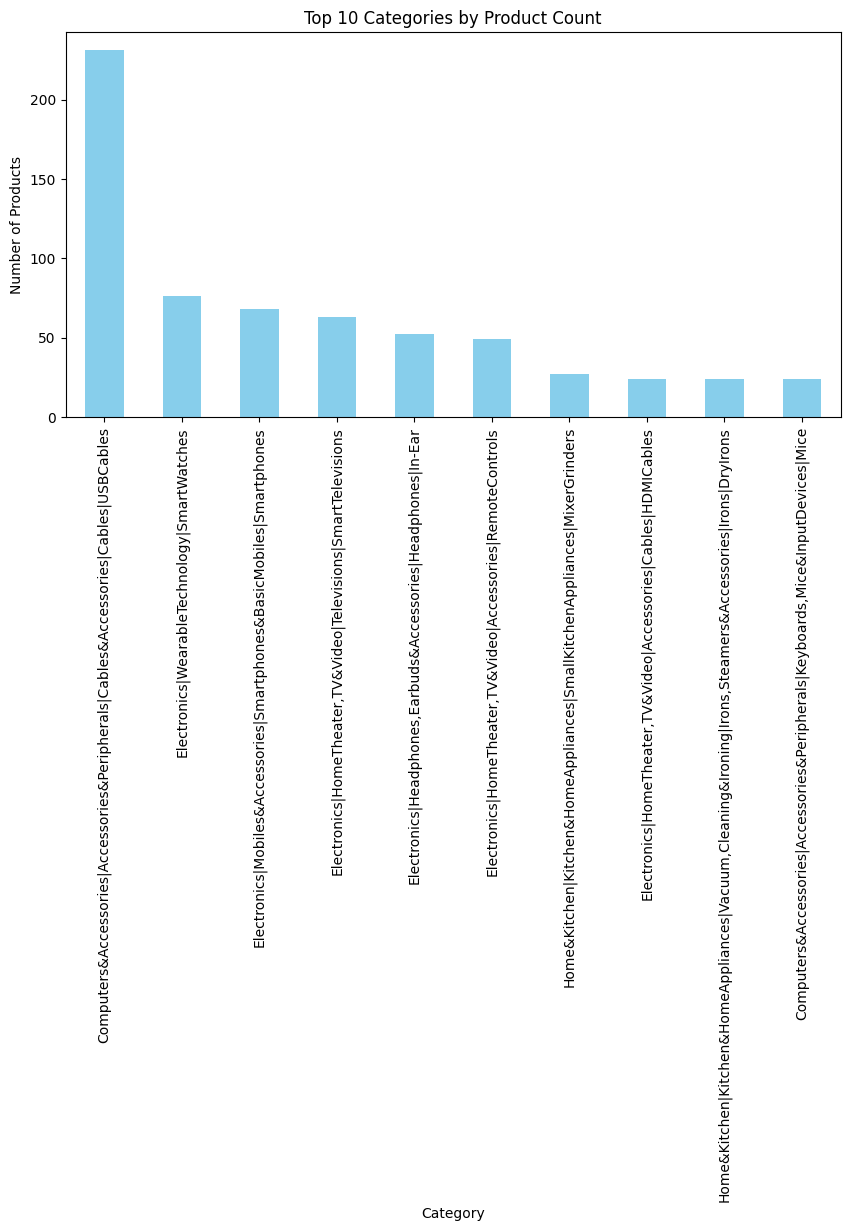

In [2]:
import matplotlib.pyplot as plt

top_categories = df["category"].value_counts().head(10)
plt.figure(figsize=(10,5))
top_categories.plot(kind="bar", color="skyblue")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.title("Top 10 Categories by Product Count")
plt.show()

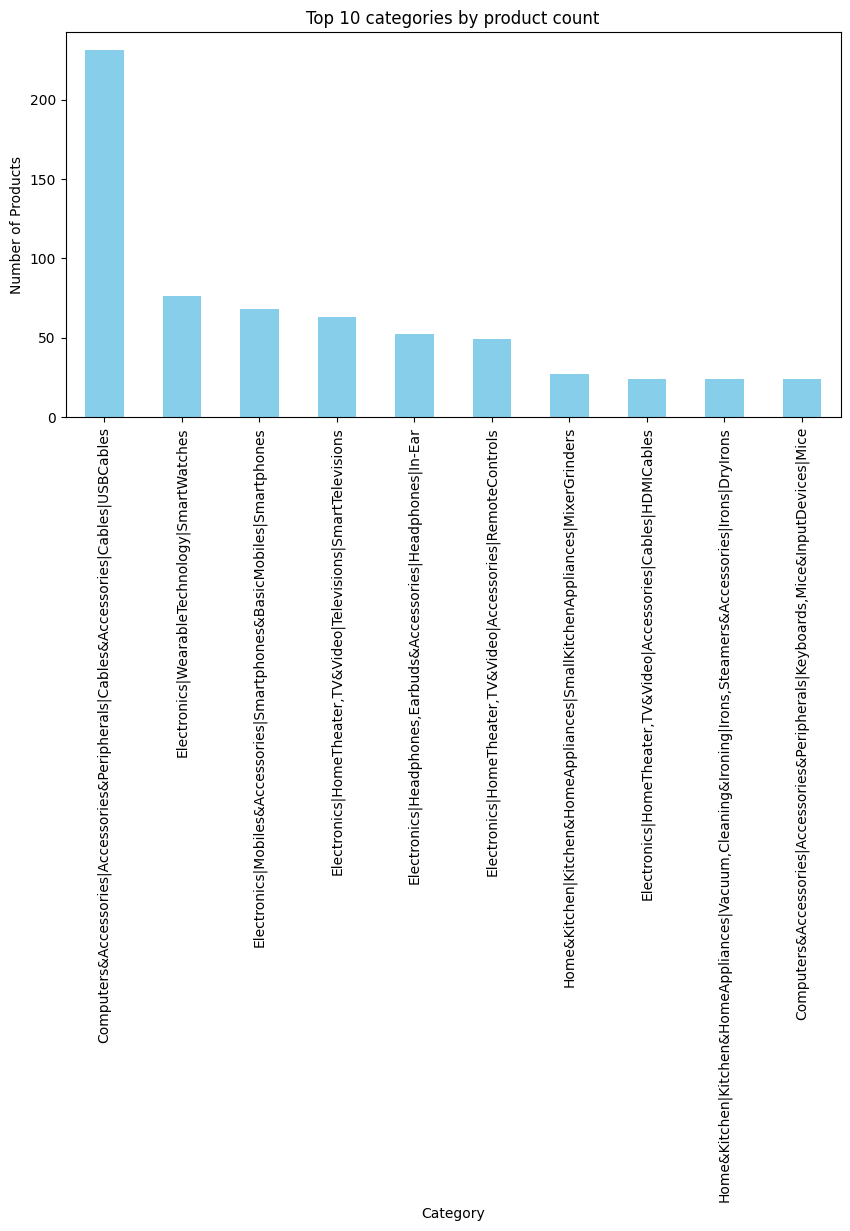

In [3]:
##top categories by sales

top_categories = df["category"].value_counts().head(10)
plt.figure(figsize=(10,5))
top_categories.plot(kind="bar",color="skyblue")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.title("Top 10 categories by product count")
plt.show()

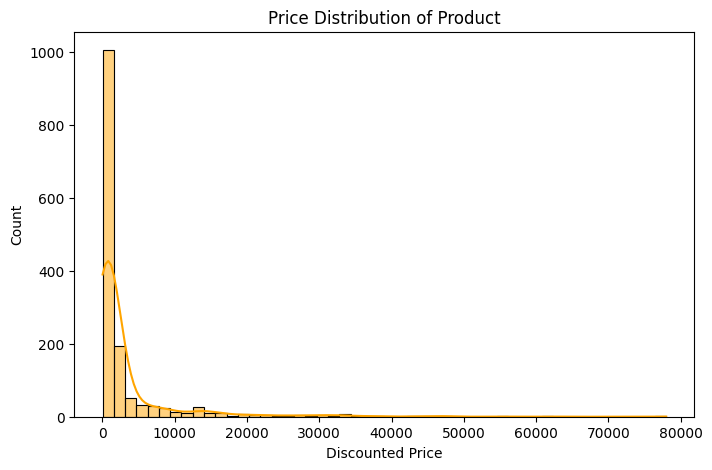

In [4]:
## Price Distribution

import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df["discounted_price"], bins=50, kde=True, color="orange")
plt.title("Price Distribution of Product")
plt.xlabel("Discounted Price")
plt.show()

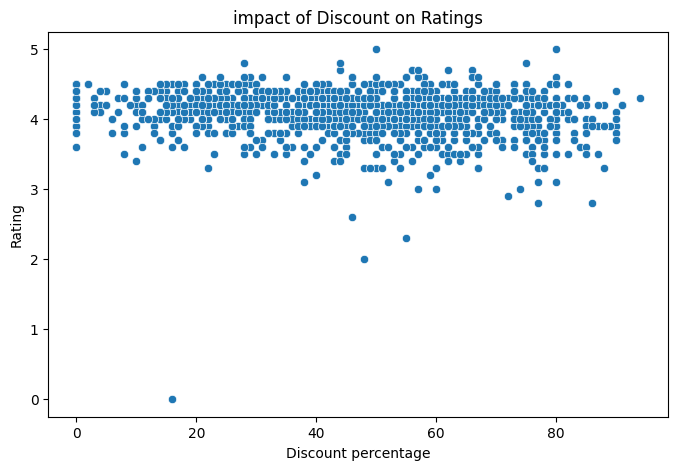

In [5]:
## correlation between discount and rating
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["discount_percentage"], y=df["rating"])
plt.xlabel("Discount percentage")
plt.ylabel("Rating")
plt.title("impact of Discount on Ratings")
plt.show()

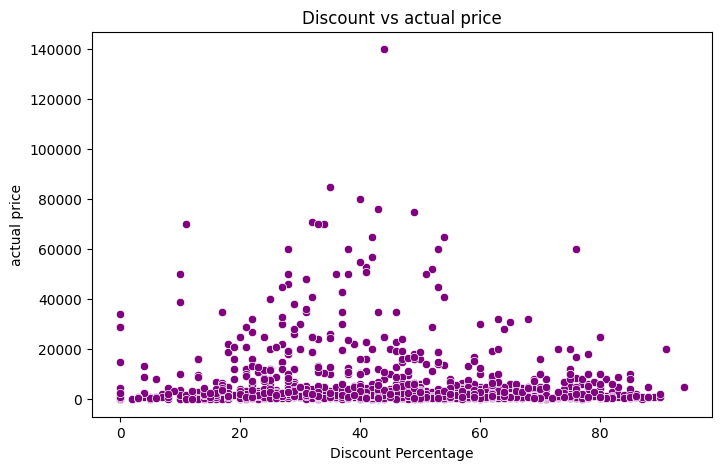

In [6]:
##discount vs actual price analysis
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["discount_percentage"], y=df["actual_price"], color="purple")
plt.xlabel("Discount Percentage")
plt.ylabel("actual price")
plt.title("Discount vs actual price")
plt.show()

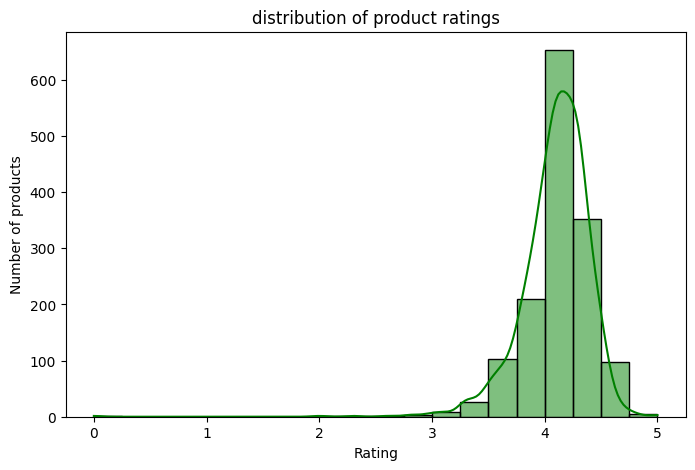

In [7]:
##Rating Distribution Across Products

plt.figure(figsize=(8,5))
sns.histplot(df["rating"], bins=20, kde=True, color="green")
plt.xlabel("Rating")
plt.ylabel("Number of products")
plt.title("distribution of product ratings")
plt.show()

In [8]:
top_reviewed = df.nlargest(10, "rating_count")[["product_name", "rating_count"]]
print(top_reviewed)

                                           product_name  rating_count
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...         992.0
750        Eveready Red 1012 AAA Batteries - Pack of 10         989.0
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...         976.0
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0
151   Zoul USB Type C Fast Charging 3A Nylon Braided...         974.0
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0
1272  Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...         959.0
1259  Hindware Atlantic Xceed 5L 3kW Instant Water H...         942.0
214   Crypo™ Universal Remote Compatible with Tata S...         928.0
1262  iBELL Castor CTEK15L Premium 1.5 Litre Stainle...         925.0


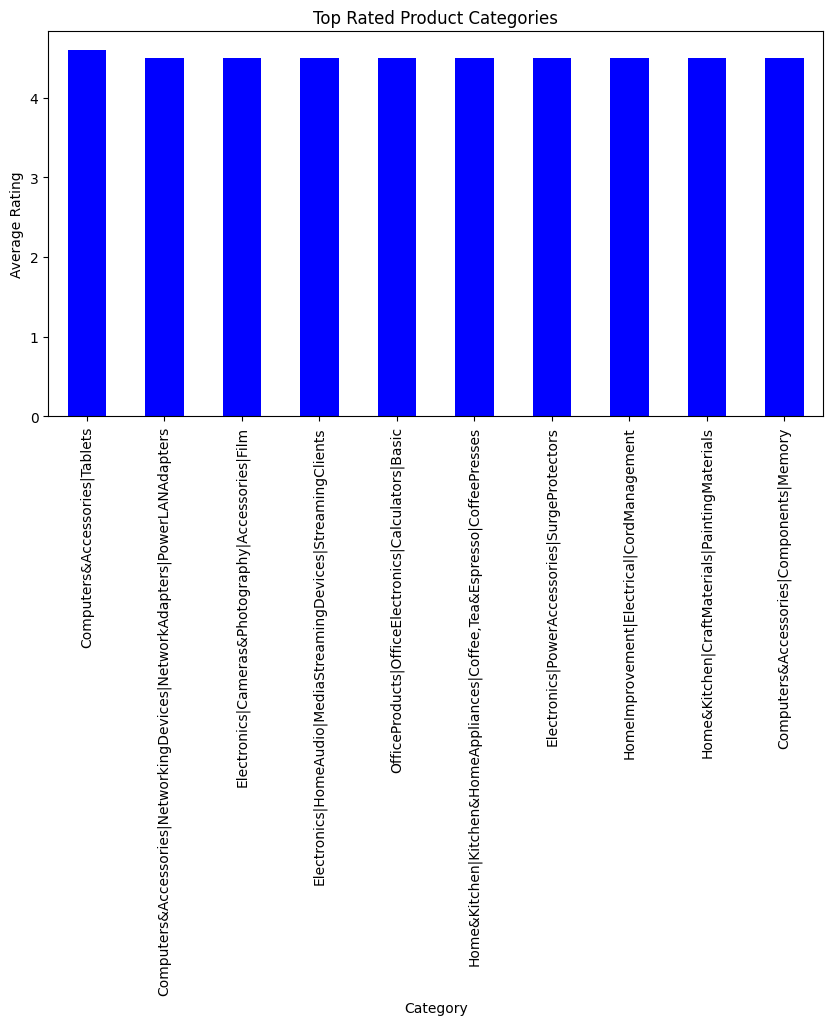

In [9]:
category_ratings = df.groupby("category")["rating"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
category_ratings.head(10).plot(kind="bar", color="blue")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.title("Top Rated Product Categories")
plt.show()


In [10]:
# Best Deals (High Discount + High Rating)

best_deals = df[(df["discount_percentage"] > 50) & (df["rating"] > 4.0)]
print(best_deals[["product_name", "discount_percentage", "rating"]].head(10))

                                         product_name  discount_percentage  \
0   Wayona Nylon Braided USB to Lightning Fast Cha...                 64.0   
3   boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...                 53.0   
4   Portronics Konnect L 1.2M Fast Charging 3A 8 P...                 61.0   
6   boAt Micro USB 55 Tangle-free, Sturdy Micro US...                 65.0   
10  Portronics Konnect L POR-1081 Fast Charging 3A...                 55.0   
11  boAt Rugged v3 Extra Tough Unbreakable Braided...                 63.0   
12  AmazonBasics Flexible Premium HDMI Cable (Blac...                 69.0   
13  Portronics Konnect CL 20W POR-1067 Type-C to 8...                 61.0   
14  Portronics Konnect L 1.2M POR-1401 Fast Chargi...                 60.0   
18  boAt Type C A325 Tangle-free, Sturdy Type C Ca...                 60.0   

    rating  
0      4.2  
3      4.2  
4      4.2  
6      4.1  
10     4.3  
11     4.2  
12     4.4  
13     4.2  
14     4.1  
18     4.1 

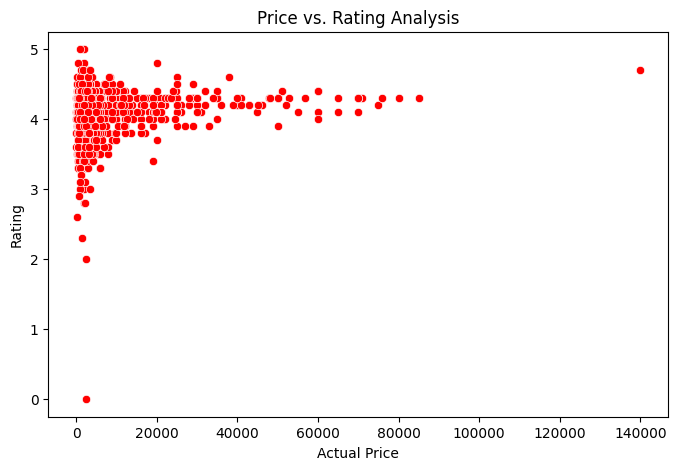

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["actual_price"], y=df["rating"], color="red")
plt.xlabel("Actual Price")
plt.ylabel("Rating")
plt.title("Price vs. Rating Analysis")
plt.show()


In [12]:
#  Sentiment Analysis on Reviews (Optional - NLP)

from textblob import TextBlob
def get_sentiment(review):
    return TextBlob(str(review)).sentiment.polarity

df["sentiment_score"] = df["review_content"].apply(get_sentiment)

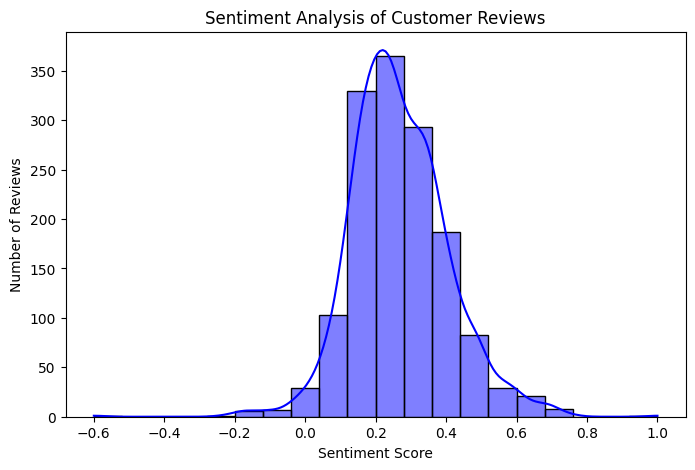

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df["sentiment_score"], bins=20, kde=True, color="blue")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Reviews")
plt.title("Sentiment Analysis of Customer Reviews")
plt.show()


In [17]:
# identify the most profitable products

df["profit"] = df["actual_price"] - df["discounted_price"]
top_profitable = df.nlargest(10, "profit")[["product_name", "actual_price", "discounted_price", "profit"]]
print(top_profitable)


                                           product_name  actual_price  \
249   Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...      139900.0   
1182  Coway Professional Air Purifier for Home, Long...       59900.0   
568   Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...       74999.0   
150   VU 138 cm (55 inches) Premium Series 4K Ultra ...       65000.0   
1354  LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...       75990.0   
283   LG 139 cm (55 inches) 4K Ultra HD Smart LED TV...       79990.0   
1306  ECOVACS DEEBOT N8 2-in-1 Robotic Vacuum Cleane...       59900.0   
255   VU 164 cm (65 inches) The GloLED Series 4K Sma...       85000.0   
108   VU 139 cm (55 inches) The GloLED Series 4K Sma...       65000.0   
323   TCL 108 cm (43 inches) 4K Ultra HD Certified A...       51990.0   

      discounted_price   profit  
249            77990.0  61910.0  
1182           14400.0  45500.0  
568            37990.0  37009.0  
150            29990.0  35010.0  
1354           42990.0  33

In [ ]:
category_discount = df.groupby("category")["discount_percentage"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
category_discount.head(10).plot(kind="bar", color="purple")
plt.xlabel("category")
plt.ylabel("Average Discount (%)")
plt.title("Top 10 categories with the highest discounts")
plt.show()